## Pedro Henrique da Silva Santos
# Tarefa 1

Carregue a base de dados wine do scikit-learn no formato de data frame
[link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

1. visualize as primeiras 7 linhas do dataframe

2. visualize as estatísticas descritivas da base de dados wine

3. Separe os dados em 2 subconjuntos (treinamento e teste)

4. Calcule as acurácias (conjunto de teste) para valores de k de 1 a 11 utilizando as distancias: 'euclidean', 'cityblock', 'chebyshev'

5. Gere os 3 gráficos (para as distâncias) da variação da acurácia com o parâmetro k

6. Selecione o melhor modelo

7. Treine o melhor modelo, calcule a  matriz de confusão e gere a sua figura

8. Aplique ambas normalizações de atributos e repita os itens 4-7 (calcule os parâmtros da normalização usando Xtrain e aplique tal normalização nos subconjuntos X_train e X_test).

9. Compile seus resultados em no relatório 1 (inclua as figuras e o código em PDF)

# 0. Preparação do ambiente e do dataset.



In [3]:
# importar os pandas para armazenar os dados em dataframes
import pandas as pd
# o numpy é utilizado para realizar algumas operações em dados
import numpy as np
# a funcao train_test_split é usada para dividir o conjunto de dados em treino e teste
from sklearn.model_selection import train_test_split
# essas duas funcoes sao usadas para analisar os resultados
from sklearn.metrics import classification_report, accuracy_score
# esse pacote contém um conjunto de datasets prontos para serem utilizados
from sklearn import datasets
# Esse pacote contém métodos de normalização de atributos
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# importa o knn
from sklearn.neighbors import KNeighborsClassifier
# para visualizar dados
import matplotlib.pyplot as plt
# importa uma função para melhor visualizar a matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Método KNN no scikit-learn:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


Carregar a base de dados Wine.

A base possui 178 amostras, cada uma com 13 features. As amostras podem ser de três classe.

In [27]:
# Carregando o dataset wine
wine = datasets.load_wine(as_frame=True)

print(f'Qtd. Atributos: {len(wine.feature_names)}')
print(f'Qtd. Classes: {len(wine.target_names)}')
print(f'Atributos: {wine.feature_names}')
print(f'Classes: {wine.target_names}')

# Exibindo as 7 primeiras linhas do dataframe
display(wine.frame.head(7))

Formato do dataset: 178
Qtd. Atributos: 13
Qtd. Classes: 3
Atributos: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0


In [5]:
# Exibindo as informações e estatísticas dos dados quantitativos do dataframe
wine.frame.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [6]:
# Carregamos os atributos de entrada (X) e alvo (y) como arrays do numpy
X, y = datasets.load_wine(return_X_y=True)

# X: array numpy [178, 13]
# y: array numpy [178, ]
# X.shape, y.shape

# 1. Preparação de modelos, treinamento, testes e avaliação de conjunto de teste e treino não normalizados.

Dividindo a o dataframe em um conjunto de treinamento e conjunto teste.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) # 40% do conjunto de dados para treinamento.

# Formato dos conjuntos de treino e teste
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (106, 13)
X_test: (72, 13)
y_train: (106,)
y_test: (72,)


Pode-se utilizar distâncias de diferentes tipos para o classificador k-NN.

1. euclidean
2. manhattan
3. chebyshev
4. minkowski
5. hamming
6. jaccard
7. matching

e muitas outras. Para mais detalhes, visite: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html


O parâmetro n_neighbors indica o número de vizinhos a ser utilizado.

Mudanças na distância e no número de vizinhos podem alterar o resultado da classificação. Por exemplo, a distância euclidiana é mais sensível ao número de vizinhos do que a chebyshev.

Vamos examinar as acurácias dos modelos com os dados normalizados e sem os dados normalizados. (Sabemos que diferenças nas escalas dos atributos dos dados *podem* afetar os métodos baseados em distancia.)

O scikit learn fornece métodos para normalizar os atributos dos dados:

[MinMax](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

[z-score](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [8]:
# Preparando os modelos KNN com as distâncias enclidiana, de chebyshev e cityblock

knn_e = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_cs = KNeighborsClassifier(n_neighbors=1, metric='chebyshev')
knn_cb = KNeighborsClassifier(n_neighbors=1, metric='cityblock')

# Treinando os modelos com os dados de treino
knn_e.fit(X_train, y_train)
knn_cs.fit(X_train, y_train)
knn_cb.fit(X_train, y_train)

KNeighborsClassifier(metric='cityblock', n_neighbors=1)

In [9]:
# Resultado da predição de cada um dos modelos para k = 1

y_pred_e = knn_e.predict(X_test)
print(f'Resultado da predição usando o modelo KNN calculando a distância Euclidiana para dados não normalizados. \n y_pred={y_pred_e}')
print(f'y_test={y_test}')
print(accuracy_score(y_pred_e, y_test))
clr = classification_report(y_test, y_pred_e, target_names=wine.target_names)
print(clr)

y_pred_cs = knn_cs.predict(X_test)
print(f'Resultado da predição usando o modelo KNN calculando a distância de Chebyshev para dados não normalizados. \n y_pred={y_pred_cs}')
print(f'y_test={y_test}')
print(accuracy_score(y_pred_cs, y_test))
clr = classification_report(y_test, y_pred_cs, target_names=wine.target_names)
print(clr)

y_pred_cb = knn_cb.predict(X_test)
print(f'Resultado da predição usando o modelo KNN calculando a distância euclidiana para dados não normalizados. \n y_pred={y_pred_cb}')
print(f'y_test={y_test}')
print(accuracy_score(y_pred_cb, y_test))
clr = classification_report(y_test, y_pred_cb, target_names=wine.target_names)
print(clr)

Resultado da predição usando o modelo KNN calculando a distância Euclidiana para dados não normalizados. 
 y_pred=[0 1 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 1 0 0 0 0
 1 1 1 2 0 1 1 1 2 2 2 2 0 2 1 0 2 0 1 2 2 1 1 2 0 2 2 1 1 0 1 0 1 1 2]
y_test=[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2 0 1 2 2 1 2 2 0 1 2 1 1 2 1 0 1 1 1]
0.75
              precision    recall  f1-score   support

     class_0       0.83      0.86      0.84        22
     class_1       0.78      0.81      0.79        31
     class_2       0.59      0.53      0.56        19

    accuracy                           0.75        72
   macro avg       0.73      0.73      0.73        72
weighted avg       0.74      0.75      0.75        72

Resultado da predição usando o modelo KNN calculando a distância de Chebyshev para dados não normalizados. 
 y_pred=[0 1 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 1 0 0 0 0
 1 1 1 2

## Avaliação do método KNN para diferentes valores de K

In [31]:
# Influência do parâmetro k

k_valores = np.arange(1,12)

acc_e = []
acc_cs = []
acc_cb = []

for k in k_valores:

  knn_e = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  knn_cs = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
  knn_cb = KNeighborsClassifier(n_neighbors=k, metric='cityblock')

  knn_e.fit(X_train, y_train)
  knn_cs.fit(X_train, y_train)
  knn_cb.fit(X_train, y_train)

  y_pred_e = knn_e.predict(X_test)
  y_pred_cs = knn_cs.predict(X_test)
  y_pred_cb = knn_cb.predict(X_test)

  acc_e.append(accuracy_score(y_test,y_pred_e))
  acc_cs.append(accuracy_score(y_test,y_pred_cs))
  acc_cb.append(accuracy_score(y_test,y_pred_cb))


acc_e = np.array(acc_e)
acc_cs = np.array(acc_cs)
acc_cb = np.array(acc_cb)

print(f'acc_e={acc_e}\n')
print(f'acc_cs={acc_cs}\n')
print(f'acc_cb={acc_cb}\n')

acc_e=[0.75       0.66666667 0.69444444 0.70833333 0.66666667 0.73611111
 0.72222222 0.69444444 0.69444444 0.68055556 0.68055556]

acc_cs=[0.75       0.65277778 0.73611111 0.72222222 0.65277778 0.68055556
 0.69444444 0.69444444 0.68055556 0.69444444 0.68055556]

acc_cb=[0.79166667 0.69444444 0.75       0.77777778 0.73611111 0.76388889
 0.70833333 0.73611111 0.72222222 0.72222222 0.73611111]



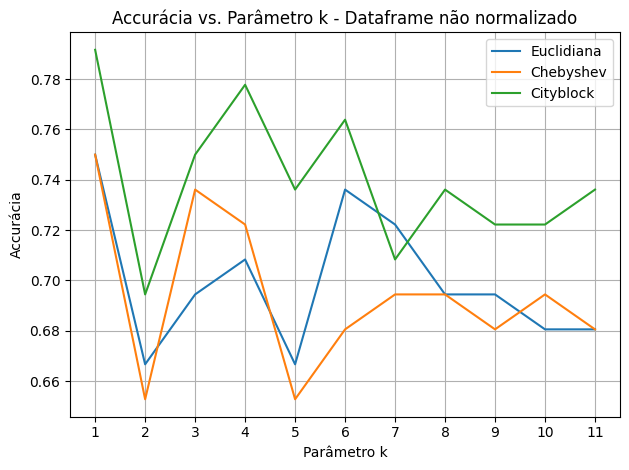

In [32]:
plt.plot(k_valores, acc_e)
plt.plot(k_valores, acc_cs)
plt.plot(k_valores, acc_cb)

plt.xticks(k_valores)

plt.xlabel('Parâmetro k')
plt.ylabel('Accurácia')

plt.title('Accurácia vs. Parâmetro k - Dataframe não normalizado')
plt.grid(True)
plt.tight_layout()
plt.legend(['Euclidiana', 'Chebyshev', 'Cityblock'])
plt.show()

In [33]:
melhor_k_e = k_valores[acc_e.argmax()]
melhor_k_cs = k_valores[acc_cs.argmax()]
melhor_k_cb = k_valores[acc_cb.argmax()]

knn_e = KNeighborsClassifier(n_neighbors=melhor_k_e, metric='euclidean')
knn_cs = KNeighborsClassifier(n_neighbors=melhor_k_cs, metric='chebyshev')
knn_cb = KNeighborsClassifier(n_neighbors=melhor_k_cb, metric='cityblock')

knn_e.fit(X_train, y_train)
knn_cs.fit(X_train, y_train)
knn_cb.fit(X_train, y_train)

y_pred_e = knn_e.predict(X_test)
y_pred_cs = knn_cs.predict(X_test)
y_pred_cb = knn_cb.predict(X_test)


print(f'Valor de k com a melhor acurácia calculado para distância euclidiana no conjunto de teste: {melhor_k_e}\n')
clr_e = classification_report(y_test, y_pred_e, target_names=wine.target_names)
print(clr_e+'\n')

print(f'Valor de k com a melhor acurácia calculado para distância chebyshev no conjunto de teste: {melhor_k_cs}\n')
clr_cs = classification_report(y_test, y_pred_cs, target_names=wine.target_names)
print(clr_cs+'\n')

print(f'Valor de k com a melhor acurácia calculado para distância cityblock no conjunto de teste: {melhor_k_cb}\n')
clr_cb = classification_report(y_test, y_pred_cb, target_names=wine.target_names)
print(clr_cb+'\n')

Valor de k com a melhor acurácia calculado para distância euclidiana no conjunto de teste: 1

              precision    recall  f1-score   support

     class_0       0.83      0.86      0.84        22
     class_1       0.78      0.81      0.79        31
     class_2       0.59      0.53      0.56        19

    accuracy                           0.75        72
   macro avg       0.73      0.73      0.73        72
weighted avg       0.74      0.75      0.75        72


Valor de k com a melhor acurácia calculado para distância chebyshev no conjunto de teste: 1

              precision    recall  f1-score   support

     class_0       0.83      0.86      0.84        22
     class_1       0.78      0.81      0.79        31
     class_2       0.59      0.53      0.56        19

    accuracy                           0.75        72
   macro avg       0.73      0.73      0.73        72
weighted avg       0.74      0.75      0.75        72


Valor de k com a melhor acurácia calculado para d

## Fazendo a matriz de confusão do modelo treinado usando a distância cityblock.

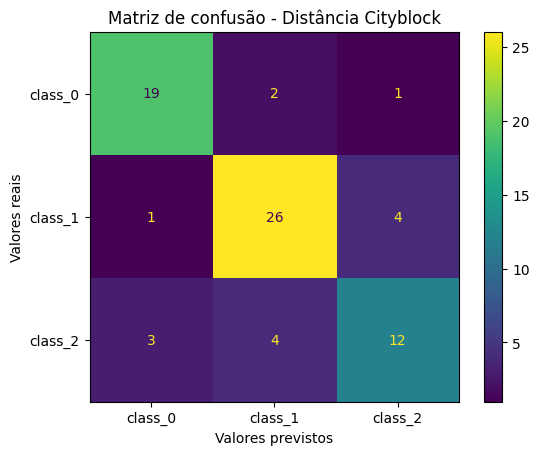

In [13]:
# calcula a matriz de confusão
cm = confusion_matrix(y_test,y_pred_cb)
# constroi um versão mais otimizada para visualização da matriz de confusão
cmd = ConfusionMatrixDisplay(cm, display_labels=list(wine.target_names))
# plota a matriz de confusão
cmd.plot()
cmd.ax_.set_title('Matriz de confusão - Distância Cityblock')
cmd.ax_.set_xlabel('Valores previstos')
cmd.ax_.set_ylabel('Valores reais')
plt.show()

# 2. Preparação de modelos, treinamento, testes e avaliação de conjunto de teste e treino normalizados.

In [14]:
# Normalizamos os atributos de X
# Inicializando as funções para normalizar os dados

scaler_std = StandardScaler() # Normalização usando média e variança
scarler_min_max = MinMaxScaler() # Normalização usando máximo e mínimo do conjunto

X_train_std = scaler_std.fit_transform(X_train) # Normalizando o conjunto features de treino com o scaler std
X_test_std = scaler_std.transform(X_test) # Normalizando o conjunto de features de teste com o scaler std

X_train_min_max = scarler_min_max.fit_transform(X_train) # Normalizando o conjunto features de treino com o scaler min max
X_test_min_max = scarler_min_max.transform(X_test) # Normalizando o conjunto de features de teste com o scaler min max

## Preparação de modelos, treinamento, testes e avaliação de conjunto de teste e treino normalizados com o Standard Scaler.

In [34]:
# Preparando os modelos KNN com as distâncias enclidiana, de chebyshev e cityblock

knn_e = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_cs = KNeighborsClassifier(n_neighbors=1, metric='chebyshev')
knn_cb = KNeighborsClassifier(n_neighbors=1, metric='cityblock')

# Treinando os modelos com os dados de treino normalizados com o StdScaler
knn_e.fit(X_train_std, y_train)
knn_cs.fit(X_train_std, y_train)
knn_cb.fit(X_train_std, y_train)

# Resultado da predição de cada um dos modelos para k = 1

y_pred_e = knn_e.predict(X_test_std)
print(f'Resultado da predição usando o modelo KNN calculando a distância Euclidiana para dados normalizados com STD Scaler. \n y_pred={y_pred_e}\n')
#print(f'y_test={y_test}\n')
#print("Acurácia: ", accuracy_score(y_pred_e, y_test))
clr = classification_report(y_test, y_pred_e, target_names=wine.target_names)
print(clr)

y_pred_cs = knn_cs.predict(X_test_std)
print(f'Resultado da predição usando o modelo KNN calculando a distância de Chebyshev para dados normalizados com STD Scaler. \n y_pred={y_pred_cs}\n')
#print(f'y_test={y_test}\n')
#print("Acurácia: ", accuracy_score(y_pred_cs, y_test))
clr = classification_report(y_test, y_pred_cs, target_names=wine.target_names)
print(clr)

y_pred_cb = knn_cb.predict(X_test_std)
print(f'Resultado da predição usando o modelo KNN calculando a distância Cityblock para dados normalizados com STD Scaler . \n y_pred={y_pred_cb}\n')
#print(f'y_test={y_test}\n')
#print("Acurácia: ", accuracy_score(y_pred_cb, y_test))
clr = classification_report(y_test, y_pred_cb, target_names=wine.target_names)
print(clr)

Resultado da predição usando o modelo KNN calculando a distância Euclidiana para dados normalizados com STD Scaler. 
 y_pred=[0 2 1 0 0 0 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2 0 1 2 2 0 2 2 0 2 2 1 2 2 1 0 1 1 2]

0.9166666666666666
              precision    recall  f1-score   support

     class_0       0.88      1.00      0.94        22
     class_1       1.00      0.81      0.89        31
     class_2       0.86      1.00      0.93        19

    accuracy                           0.92        72
   macro avg       0.91      0.94      0.92        72
weighted avg       0.93      0.92      0.92        72

Resultado da predição usando o modelo KNN calculando a distância de Chebyshev para dados normalizados com STD Scaler. 
 y_pred=[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 2 2 0 0 2 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 0 2 0 2 2 0 2 0 1 2 2 0 2 2 0 2 2 1 2 2 0 0 1 1 2]

0.8888888888888888
              precision    recall

In [16]:
# Influência do parâmetro k para o KNN com dados normalizados com Std Scaler.

k_valores = np.arange(1,12)

acc_e = []
acc_cs = []
acc_cb = []

for k in k_valores:

  knn_e = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  knn_cs = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
  knn_cb = KNeighborsClassifier(n_neighbors=k, metric='cityblock')

  knn_e.fit(X_train_std, y_train)
  knn_cs.fit(X_train_std, y_train)
  knn_cb.fit(X_train_std, y_train)

  y_pred_e = knn_e.predict(X_test_std)
  y_pred_cs = knn_cs.predict(X_test_std)
  y_pred_cb = knn_cb.predict(X_test_std)

  acc_e.append(accuracy_score(y_test,y_pred_e))
  acc_cs.append(accuracy_score(y_test,y_pred_cs))
  acc_cb.append(accuracy_score(y_test,y_pred_cb))


acc_e = np.array(acc_e)
acc_cs = np.array(acc_cs)
acc_cb = np.array(acc_cb)

print(f'acc_e={acc_e}\n')
print(f'acc_cs={acc_cs}\n')
print(f'acc_cb={acc_cb}\n')

acc_e=[0.91666667 0.875      0.90277778 0.90277778 0.97222222 0.94444444
 0.95833333 0.94444444 0.95833333 0.93055556 0.93055556]

acc_cs=[0.88888889 0.84722222 0.88888889 0.88888889 0.88888889 0.91666667
 0.91666667 0.90277778 0.90277778 0.88888889 0.91666667]

acc_cb=[0.94444444 0.94444444 0.95833333 0.94444444 0.97222222 0.95833333
 0.95833333 0.95833333 0.93055556 0.94444444 0.94444444]



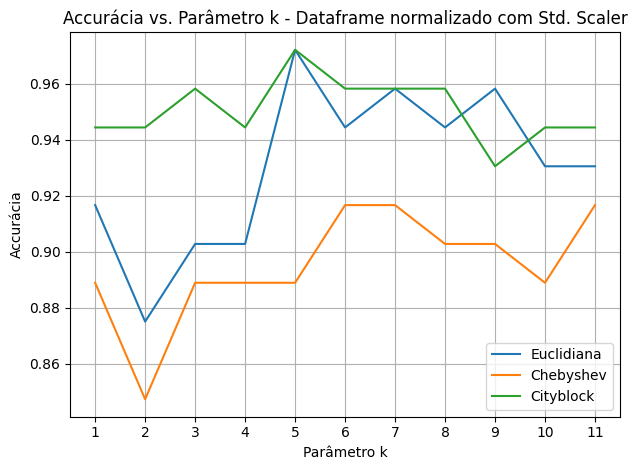

In [17]:
plt.plot(k_valores, acc_e)
plt.plot(k_valores, acc_cs)
plt.plot(k_valores, acc_cb)

plt.xticks(k_valores)

plt.xlabel('Parâmetro k')
plt.ylabel('Accurácia')

plt.title('Accurácia vs. Parâmetro k - Dataframe normalizado com Std. Scaler')
plt.grid(True)
plt.tight_layout()
plt.legend(['Euclidiana', 'Chebyshev', 'Cityblock'])
plt.show()

É possíver ver que para os dados nomalizados com o Std. Scaler, as acurácias aumentaram em comparação com os dados não normalizados e os maiores valores foram obtidos para K=5 para os modelos usando as distâncias Euclidianas e Cityblock. O modelo usando a distância de Chebyshev não obteve acurácia similar ou igual aos outros modelos.
No proóximo bloco de código é exibido com o relatório de classificação, os resultados dos modelos com o melhor valor de K.

In [18]:
melhor_k_e = k_valores[acc_e.argmax()]
melhor_k_cs = k_valores[acc_cs.argmax()]
melhor_k_cb = k_valores[acc_cb.argmax()]

knn_e = KNeighborsClassifier(n_neighbors=melhor_k_e, metric='euclidean')
knn_cs = KNeighborsClassifier(n_neighbors=melhor_k_cs, metric='chebyshev')
knn_cb = KNeighborsClassifier(n_neighbors=melhor_k_cb, metric='cityblock')

knn_e.fit(X_train_std, y_train)
knn_cs.fit(X_train_std, y_train)
knn_cb.fit(X_train_std, y_train)

y_pred_e = knn_e.predict(X_test_std)
y_pred_cs = knn_cs.predict(X_test_std)
y_pred_cb = knn_cb.predict(X_test_std)


print(f'Valor de k com a melhor acurácia calculado para distância euclidiana no conjunto de teste normaliado com o Std. Scaler: {melhor_k_e}\n')
clr_e = classification_report(y_test, y_pred_e, target_names=wine.target_names)
print(clr_e+'\n')

print(f'Valor de k com a melhor acurácia calculado para distância chebyshev no conjunto de test normaliado com o Std. Scaler: {melhor_k_cs}\n')
clr_cs = classification_report(y_test, y_pred_cs, target_names=wine.target_names)
print(clr_cs+'\n')

print(f'Valor de k com a melhor acurácia calculado para distância cityblock no conjunto de teste normaliado com o Std. Scaler: {melhor_k_cb}\n')
clr_cb = classification_report(y_test, y_pred_cb, target_names=wine.target_names)
print(clr_cb+'\n')

Valor de k com a melhor acurácia calculado para distância euclidiana no conjunto de teste normaliado com o Std. Scaler: 5

              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98        22
     class_1       1.00      0.94      0.97        31
     class_2       0.95      1.00      0.97        19

    accuracy                           0.97        72
   macro avg       0.97      0.98      0.97        72
weighted avg       0.97      0.97      0.97        72


Valor de k com a melhor acurácia calculado para distância chebyshev no conjunto de test normaliado com o Std. Scaler: 6

              precision    recall  f1-score   support

     class_0       0.88      1.00      0.94        22
     class_1       0.96      0.84      0.90        31
     class_2       0.90      0.95      0.92        19

    accuracy                           0.92        72
   macro avg       0.91      0.93      0.92        72
weighted avg       0.92      0.92      0.92     

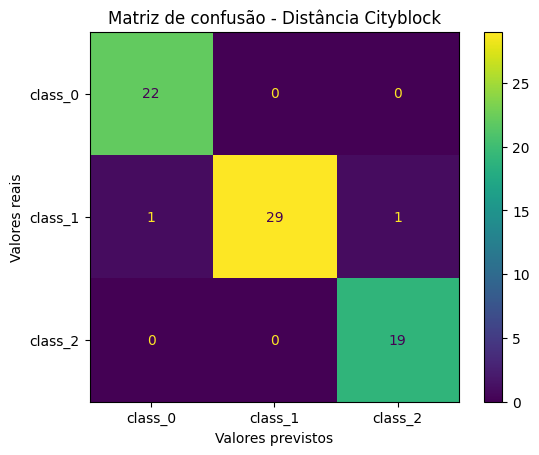

In [19]:
## Analisando os reports de classificação é possível ver que o modelo que usou a distância Euclidiana obteve acurácia
# igual ao modelo que usou a distância cityblock, porém, ao olhar o gráfico é possível ver que o modelo que usou
# a distância cityblock teve melhor desempenho no geral. Por isso a matriz de confusão será feita a partir desse
# modelo.

# calcula a matriz de confusão
cm = confusion_matrix(y_test,y_pred_cb)
# constroi um versão mais otimizada para visualização da matriz de confusão
cmd = ConfusionMatrixDisplay(cm, display_labels=list(wine.target_names))
# plota a matriz de confusão
cmd.plot()
cmd.ax_.set_title('Matriz de confusão - Distância Cityblock')
cmd.ax_.set_xlabel('Valores previstos')
cmd.ax_.set_ylabel('Valores reais')
plt.show()

## Preparação de modelos, treinamento, testes e avaliação de conjunto de teste e treino normalizados com o Min Max Scaler.

In [20]:
# Preparando os modelos KNN com as distâncias enclidiana, de chebyshev e cityblock

knn_e = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn_cs = KNeighborsClassifier(n_neighbors=1, metric='chebyshev')
knn_cb = KNeighborsClassifier(n_neighbors=1, metric='cityblock')

# Treinando os modelos com os dados de treino normalizados com o Min Max Scaler
knn_e.fit(X_train_min_max, y_train)
knn_cs.fit(X_train_min_max, y_train)
knn_cb.fit(X_train_min_max, y_train)

# Resultado da predição de cada um dos modelos para k = 1

y_pred_e = knn_e.predict(X_test_min_max)
print(f'Resultado da predição usando o modelo KNN calculando a distância Euclidiana para dados normalizados com Min Max Scaler. \n y_pred={y_pred_e}\n')
print(f'y_test={y_test}\n')
print(accuracy_score(y_pred_e, y_test))
clr = classification_report(y_test, y_pred_e, target_names=wine.target_names)
print(clr)

y_pred_cs = knn_cs.predict(X_test_min_max)
print(f'Resultado da predição usando o modelo KNN calculando a distância de Chebyshev para dados normalizados com Min Max Scaler. \n y_pred={y_pred_cs}\n')
print(f'y_test={y_test}\n')
print(accuracy_score(y_pred_cs, y_test))
clr = classification_report(y_test, y_pred_cs, target_names=wine.target_names)
print(clr)

y_pred_cb = knn_cb.predict(X_test_min_max)
print(f'Resultado da predição usando o modelo KNN calculando a distância Cityblock para dados normalizados com Min Max Scaler . \n y_pred={y_pred_cb}\n')
print(f'y_test={y_test}\n')
print(accuracy_score(y_pred_cb, y_test))
clr = classification_report(y_test, y_pred_cb, target_names=wine.target_names)
print(clr)

Resultado da predição usando o modelo KNN calculando a distância Euclidiana para dados normalizados com Min Max Scaler. 
 y_pred=[0 2 1 0 0 0 0 2 1 1 2 2 0 0 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 0 2 0 2 2 0 2 0 1 2 2 0 2 2 0 2 2 1 2 2 1 0 1 1 2]

y_test=[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2 0 1 2 2 1 2 2 0 1 2 1 1 2 1 0 1 1 1]

0.8888888888888888
              precision    recall  f1-score   support

     class_0       0.81      1.00      0.90        22
     class_1       1.00      0.74      0.85        31
     class_2       0.86      1.00      0.93        19

    accuracy                           0.89        72
   macro avg       0.89      0.91      0.89        72
weighted avg       0.91      0.89      0.89        72

Resultado da predição usando o modelo KNN calculando a distância de Chebyshev para dados normalizados com Min Max Scaler. 
 y_pred=[0 2 1 0 1 0 0 2 1 1 2 2 0 1 2 1 0 0 

In [21]:
# Influência do parâmetro k para o KNN com dados normalizados com Min Max Scaler.

k_valores = np.arange(1,12)

acc_e = []
acc_cs = []
acc_cb = []

for k in k_valores:

  knn_e = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  knn_cs = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
  knn_cb = KNeighborsClassifier(n_neighbors=k, metric='cityblock')

  knn_e.fit(X_train_min_max, y_train)
  knn_cs.fit(X_train_min_max, y_train)
  knn_cb.fit(X_train_min_max, y_train)

  y_pred_e = knn_e.predict(X_test_min_max)
  y_pred_cs = knn_cs.predict(X_test_min_max)
  y_pred_cb = knn_cb.predict(X_test_min_max)

  acc_e.append(accuracy_score(y_test,y_pred_e))
  acc_cs.append(accuracy_score(y_test,y_pred_cs))
  acc_cb.append(accuracy_score(y_test,y_pred_cb))


acc_e = np.array(acc_e)
acc_cs = np.array(acc_cs)
acc_cb = np.array(acc_cb)

print(f'acc_e={acc_e}\n')
print(f'acc_cs={acc_cs}\n')
print(f'acc_cb={acc_cb}\n')

acc_e=[0.88888889 0.91666667 0.93055556 0.93055556 0.97222222 0.95833333
 0.97222222 0.94444444 0.95833333 0.94444444 0.93055556]

acc_cs=[0.94444444 0.88888889 0.93055556 0.90277778 0.90277778 0.91666667
 0.90277778 0.91666667 0.91666667 0.91666667 0.91666667]

acc_cb=[0.97222222 0.93055556 0.97222222 0.94444444 0.98611111 0.95833333
 0.94444444 0.95833333 0.93055556 0.94444444 0.95833333]



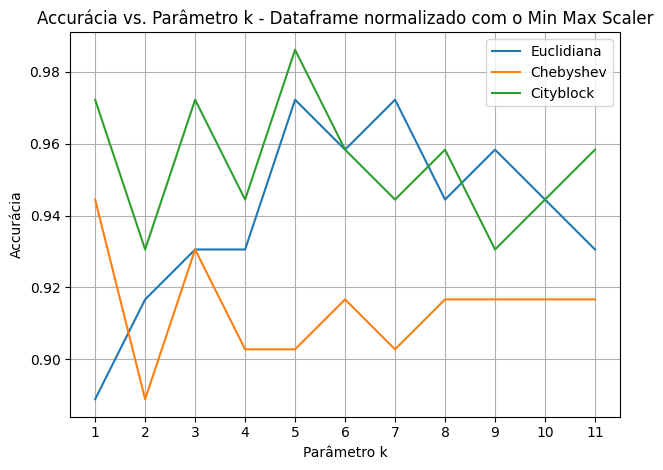

In [22]:
plt.plot(k_valores, acc_e)
plt.plot(k_valores, acc_cs)
plt.plot(k_valores, acc_cb)

plt.xticks(k_valores)

plt.xlabel('Parâmetro k')
plt.ylabel('Accurácia')

plt.title('Accurácia vs. Parâmetro k - Dataframe normalizado com o Min Max Scaler')
plt.grid(True)
plt.tight_layout()
plt.legend(['Euclidiana', 'Chebyshev', 'Cityblock'])
plt.show()

Os modelos que usaram as distâncias Euclidianas e Cityblock obtiveram acurácia melhores que o modelo com a distância de Chebyshev, no geral.

In [23]:
melhor_k_e = k_valores[acc_e.argmax()]
melhor_k_cs = k_valores[acc_cs.argmax()]
melhor_k_cb = k_valores[acc_cb.argmax()]

knn_e = KNeighborsClassifier(n_neighbors=melhor_k_e, metric='euclidean')
knn_cs = KNeighborsClassifier(n_neighbors=melhor_k_cs, metric='chebyshev')
knn_cb = KNeighborsClassifier(n_neighbors=melhor_k_cb, metric='cityblock')

knn_e.fit(X_train_min_max, y_train)
knn_cs.fit(X_train_min_max, y_train)
knn_cb.fit(X_train_min_max, y_train)

y_pred_e = knn_e.predict(X_test_min_max)
y_pred_cs = knn_cs.predict(X_test_min_max)
y_pred_cb = knn_cb.predict(X_test_min_max)


print(f'Valor de k com a melhor acurácia calculado para distância euclidiana no conjunto de teste normaliado com o Min Max Scaler: {melhor_k_e}\n')
clr_e = classification_report(y_test, y_pred_e, target_names=wine.target_names)
print(clr_e+'\n')

print(f'Valor de k com a melhor acurácia calculado para distância chebyshev no conjunto de test normaliado com o Min Max Scaler: {melhor_k_cs}\n')
clr_cs = classification_report(y_test, y_pred_cs, target_names=wine.target_names)
print(clr_cs+'\n')

print(f'Valor de k com a melhor acurácia calculado para distância cityblock no conjunto de teste normaliado com o Min Max Scaler: {melhor_k_cb}\n')
clr_cb = classification_report(y_test, y_pred_cb, target_names=wine.target_names)
print(clr_cb+'\n')

Valor de k com a melhor acurácia calculado para distância euclidiana no conjunto de teste normaliado com o Min Max Scaler: 5

              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98        22
     class_1       1.00      0.94      0.97        31
     class_2       0.95      1.00      0.97        19

    accuracy                           0.97        72
   macro avg       0.97      0.98      0.97        72
weighted avg       0.97      0.97      0.97        72


Valor de k com a melhor acurácia calculado para distância chebyshev no conjunto de test normaliado com o Min Max Scaler: 1

              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98        22
     class_1       1.00      0.87      0.93        31
     class_2       0.86      1.00      0.93        19

    accuracy                           0.94        72
   macro avg       0.94      0.96      0.95        72
weighted avg       0.95      0.94      0.9

Plotando a matriz de confusão do modelo KNN calculado com a distância Cityblock.

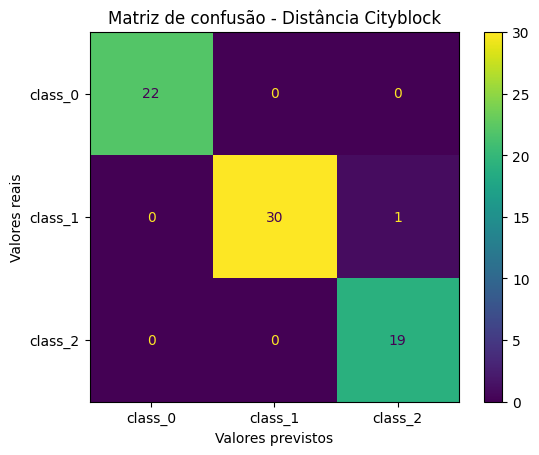

In [24]:
# calcula a matriz de confusão
cm = confusion_matrix(y_test,y_pred_cb)
# constroi um versão mais otimizada para visualização da matriz de confusão
cmd = ConfusionMatrixDisplay(cm, display_labels=list(wine.target_names))
# plota a matriz de confusão
cmd.plot()
cmd.ax_.set_title('Matriz de confusão - Distância Cityblock')
cmd.ax_.set_xlabel('Valores previstos')
cmd.ax_.set_ylabel('Valores reais')
plt.show()